In [143]:
from covCOCO import tococo_test,tococo

In [144]:
import numpy as np
# import torch
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib

In [145]:
import os

In [146]:
mode_list = os.listdir('output_new/') # the path of predicted resuts you saved 

In [147]:
mode_list.append('end2end')

In [148]:
if '.ipynb_checkpoints' in mode_list:
    mode_list.remove('.ipynb_checkpoints')

In [149]:
# mode_list.remove('area')

In [150]:
## convet to COCO standand test format
for mode in mode_list:
    
    
    exp_list = os.listdir(f'output_new/{mode}/')
    if '.ipynb_checkpoints' in exp_list:
        exp_list.remove('.ipynb_checkpoints')
    for exp in exp_list:
        
        pred_path = f'output_new/{mode}/{exp}/'
        
        save_path = f'output_coco/{mode}/{exp}/'
        # print(save_path)
        os.makedirs(save_path,exist_ok = True)
        
        avai_labels = os.listdir(pred_path)
        if '.ipynb_checkpoints' in avai_labels:
            avai_labels.remove('.ipynb_checkpoints')
        
        json_paths =  [ pred_path+i for i in avai_labels] 
        
        c = tococo_test(json_paths, save_path)
        c.save_json()
    

In [151]:
save_path

'output_coco/end2end/8058/'

In [152]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [154]:
annFile = 'test/ground.json' #the path of coco ground truth
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [157]:
def display_metrics(precision, recall, scores, iou_lookup, class_name=None, log_path='evaluation.txt'):   

        
    result = np.zeros((len(iou_lookup.keys()),4 ))
    cout = 0
    for iou in iou_lookup.keys():
        precesion_iou = precision[iou_lookup[iou], :, :, 0, -1].mean(1)
        scores_iou = scores[iou_lookup[iou], :, :, 0, -1].mean(1)
        recall_iou = recall[iou_lookup[iou], :, 0, -1]
        prec = precesion_iou.mean()
        rec = recall_iou.mean()
        
        result[cout,:]  = np.array([iou, (2 * prec * rec / (prec + rec + 1e-8)), prec, rec ])
        cout = cout+1
    
    
    return result

In [158]:
from Evaluator import evaluate_metrics, display_metrics


In [159]:
performance = np.zeros((30,10),dtype=object)

In [160]:
# result

In [161]:
mode_list

['area', 'box', 'end2end', 'our', 'point', 'sam', 'end2end']

In [162]:
exp_id = 0
for mode in mode_list:
    # print(mode)
    
    exp_list = os.listdir(f'output_new/{mode}/')
    if '.ipynb_checkpoints' in exp_list:
        exp_list.remove('.ipynb_checkpoints')
        
    for exp in exp_list:
        
        performance[exp_id,0] = mode
        
        
        
        
        pred_path = f'output_coco/{mode}/{exp}/'
        
        file_list = os.listdir(pred_path)
        if '.ipynb_checkpoints' in file_list:
            file_list.remove('.ipynb_checkpoints')
            
        cocoDt=cocoGt.loadRes(pred_path+file_list[0])
        annType = 'segm' #['segm','bbox','keypoints']
        imgIds=sorted(cocoGt.getImgIds())
        cocoEval = COCOeval(cocoGt,cocoDt,annType)
        cocoEval.params.imgIds  = imgIds
        cocoEval.evaluate()
        
        params = cocoEval.params
        
        cocoEval.accumulate()
        precision, recall, scores, iou_lookup = evaluate_metrics(cocoEval, params,True)
        result = display_metrics(precision, recall, scores, iou_lookup, log_path=None) #iou, f1, p ,r 
        mean_result = np.mean(result,0) #get0.5:0.95
        p_05_095 = mean_result[2]
        p_05 =  result[0,2]
        p_075 =  result[5,2]
        
        r_05_095 = mean_result[3]
        r_05 = result[0,3]
        r_075 = result[5,3]
        
        f1_05_095= mean_result[1]
        f1_05 = result[0,1]
        f1_075 = result[5,1]
        
        
        # print(f1_05_095)
        performance[exp_id,1:]= [ p_05_095,p_05,p_075, r_05_095, r_05,r_075,f1_05_095,f1_05,f1_075]
        exp_id = exp_id+1
        # cocoEval.summarize()
        # save_path = f'output_csv/{mode}/{exp}/'
        # # print(save_path)
        # os.makedirs(save_path,exist_ok = True)
        
       

Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.01s).
IoU Thresholds:  [0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95]
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.637
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.814
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.670
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.184
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.597
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.110
 Average Recall     (AR) @[ 

IndexError: index 30 is out of bounds for axis 0 with size 30

In [83]:
# performance

In [163]:
import pandas as pd



df = pd.DataFrame(performance, columns = ['Method','AP@[0.5,0.95]','AP@0.5','AP@0.75','AR@[0.5,0.95]','AR@0.5','AR@0.75', 'F1@[0.5,0.95]','F1@0.5','F1@0.75',   ])


In [164]:
mode_list_new = ['Ours','SAM-only','YOLOv8-Seg','BB-SAM','P-SAM']

save_id = random.randint(3, 10000)
# SAM-only, an end-to-end model YOLOv8-Seg, bounding box based SAM (BB-SAM), and point based SAM (P-SAM)

In [165]:
a = []
for i in mode_list_new:
    a.extend([i,i,i,i,i])

In [166]:
df

,Method,"AP@[0.5,0.95]",AP@0.5,AP@0.75,"AR@[0.5,0.95]",AR@0.5,AR@0.75,"F1@[0.5,0.95]",F1@0.5,F1@0.75
0,area,0.637325,0.814003,0.669517,0.696304,0.833629,0.73227,0.664197,0.823699,0.699489
1,area,0.648501,0.81792,0.687192,0.709104,0.836293,0.753496,0.676456,0.827004,0.718819
2,area,0.661163,0.828722,0.71111,0.722189,0.851582,0.771143,0.689263,0.839996,0.739911
3,area,0.658413,0.828923,0.692958,0.720577,0.849528,0.767619,0.686986,0.839099,0.72838
4,area,0.657822,0.828012,0.690014,0.717514,0.850416,0.754661,0.685296,0.839065,0.720891
5,box,0.612429,0.779474,0.625298,0.680252,0.813013,0.700749,0.643489,0.795891,0.660877
6,box,0.625833,0.80406,0.649123,0.694964,0.829523,0.727275,0.65753,0.816593,0.68598
7,box,0.647331,0.819117,0.676044,0.713588,0.843923,0.749334,0.677591,0.831335,0.710805
8,box,0.639997,0.813244,0.671777,0.710619,0.837153,0.752886,0.67224,0.825025,0.710023
9,box,0.644165,0.818975,0.669042,0.708768,0.844229,0.741704,0.673716,0.83141,0.703502


In [167]:
df_c = df.loc[df['Method']=='our']#pd.DataFrame([],columns=df.columns)
df_c =df_c.append(df.loc[df['Method']=='sam'])
df_c =df_c.append(df.loc[df['Method']=='end2end'])
df_c =df_c.append(df.loc[df['Method']=='box'])
df_c =df_c.append(df.loc[df['Method']=='point'])


# df_c.loc[df_c['Method']=='End-to-End'] =  df.loc[df['Method']=='end2end']
# df_c.loc[df_c['Method']=='Bounding Box+SAM'] =  df.loc[df['Method']=='box']
# df_c.loc[df_c['Method']=='Point+SAM'] =  df.loc[df['Method']=='point']

/local_scratch/pbs.615878.pbs02/ipykernel_3523927/3595808996.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_c =df_c.append(df.loc[df['Method']=='sam'])
/local_scratch/pbs.615878.pbs02/ipykernel_3523927/3595808996.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_c =df_c.append(df.loc[df['Method']=='end2end'])
/local_scratch/pbs.615878.pbs02/ipykernel_3523927/3595808996.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_c =df_c.append(df.loc[df['Method']=='box'])
/local_scratch/pbs.615878.pbs02/ipykernel_3523927/3595808996.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_c =df_c.append(df.loc[df['Method']=='point']

In [168]:
df_c['Method']=a

In [169]:

df_c.to_csv(f'all_result_{save_id}.csv')

In [170]:
mean_df = df_c.groupby('Method',sort=False).mean()

In [171]:
mean_df

,"AP@[0.5,0.95]",AP@0.5,AP@0.75,"AR@[0.5,0.95]",AR@0.5,AR@0.75,"F1@[0.5,0.95]",F1@0.5,F1@0.75
Method,,,,,,,,,
Ours,0.652645,0.823516,0.690158,0.713138,0.844290,0.755838,0.680440,0.833773,0.721498
SAM-only,0.105942,0.141095,0.109366,0.323213,0.403169,0.330794,0.159407,0.208987,0.164327
YOLOv8-Seg,0.629829,0.763599,0.701301,0.666812,0.780727,0.733779,0.647324,0.772064,0.717165
BB-SAM,0.633951,0.806974,0.658257,0.701638,0.833568,0.734390,0.664913,0.820051,0.694237
P-SAM,0.489411,0.695220,0.475139,0.596247,0.755799,0.601559,0.536518,0.724242,0.530919


In [172]:
std_df = df_c.groupby('Method',sort=False).std()

In [173]:
std_df

,"AP@[0.5,0.95]",AP@0.5,AP@0.75,"AR@[0.5,0.95]",AR@0.5,AR@0.75,"F1@[0.5,0.95]",F1@0.5,F1@0.75
Method,,,,,,,,,
Ours,0.009804,0.007042,0.014847,0.010678,0.008599,0.015292,0.010295,0.007785,0.014819
SAM-only,0.008994,0.011073,0.010076,0.014725,0.016639,0.017529,0.011982,0.014380,0.013468
YOLOv8-Seg,0.008184,0.013200,0.009926,0.009072,0.014511,0.011749,0.008312,0.013734,0.010522
BB-SAM,0.014569,0.016549,0.021126,0.013930,0.012967,0.021220,0.014190,0.014805,0.021158
P-SAM,0.008121,0.009997,0.009033,0.007276,0.009600,0.007973,0.007792,0.009700,0.008567


In [174]:
import copy

In [175]:
mean_std_df = copy.deepcopy(std_df)
for i in range(5):
    for j in range(9):
        mean_std_df.iloc[i,j] = f'{round(mean_df.iloc[i,j],4)}'+'+-'+f'{round(std_df.iloc[i,j],4)}'

In [176]:
import random

In [177]:
random.randint(3, 9)

5

In [178]:
mean_std_df.to_csv(f'mean_std_df{save_id}.csv')

In [179]:
mean_std_df

,"AP@[0.5,0.95]",AP@0.5,AP@0.75,"AR@[0.5,0.95]",AR@0.5,AR@0.75,"F1@[0.5,0.95]",F1@0.5,F1@0.75
Method,,,,,,,,,
Ours,0.6526+-0.0098,0.8235+-0.007,0.6902+-0.0148,0.7131+-0.0107,0.8443+-0.0086,0.7558+-0.0153,0.6804+-0.0103,0.8338+-0.0078,0.7215+-0.0148
SAM-only,0.1059+-0.009,0.1411+-0.0111,0.1094+-0.0101,0.3232+-0.0147,0.4032+-0.0166,0.3308+-0.0175,0.1594+-0.012,0.209+-0.0144,0.1643+-0.0135
YOLOv8-Seg,0.6298+-0.0082,0.7636+-0.0132,0.7013+-0.0099,0.6668+-0.0091,0.7807+-0.0145,0.7338+-0.0117,0.6473+-0.0083,0.7721+-0.0137,0.7172+-0.0105
BB-SAM,0.634+-0.0146,0.807+-0.0165,0.6583+-0.0211,0.7016+-0.0139,0.8336+-0.013,0.7344+-0.0212,0.6649+-0.0142,0.8201+-0.0148,0.6942+-0.0212
P-SAM,0.4894+-0.0081,0.6952+-0.01,0.4751+-0.009,0.5962+-0.0073,0.7558+-0.0096,0.6016+-0.008,0.5365+-0.0078,0.7242+-0.0097,0.5309+-0.0086


# display in mongtage

In [ ]:
stop

In [255]:

import skimage.util






Image_list = []
for mode in mode_list:
    print(mode)
    
    save_visul_mode = save_visul+mode+'/'
    os.makedirs(save_visul_mode,exist_ok = True)
    
    
    
    
    exp_list = os.listdir(f'output/{mode}/')
    if '.ipynb_checkpoints' in exp_list:
        exp_list.remove('.ipynb_checkpoints')
        
    for exp in [exp_list[0]]:
        Image_list.append(skimage.io.imread(save_visul_mode+'all.jpg'))
        for jj in range(10):
             Image_list.append(skimage.io.imread(save_visul_mode+f'{jj}.jpg'))
                
                
 

box
end2end
our
point
sam


In [256]:
m_fill = skimage.util.montage(Image_list, grid_shape=(5, 11), multichannel=True)

/local_scratch/pbs.604587.pbs02/ipykernel_2304127/2086284145.py:1: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  m_fill = skimage.util.montage(Image_list, grid_shape=(5, 11), multichannel=True)


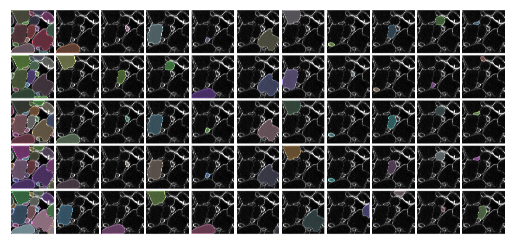

In [257]:
# plt.figure(dpi=5000)
plt.imshow(m_fill)
plt.axis('off')
plt.savefig(save_visul+ f'{img_id}.jpg' , bbox_inches = 'tight')
plt.show()